In [66]:
from __future__ import annotations
import MSE_Analysis_new as mse
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [ ]:
p_list = [20, 30, 40, 50]
n_list=[500, 1000, 2000, 3000, 4000]


p_dict= {}
estimator_list = ['OLS', 'T-Learner', 'CF DML', 'X-Learner', 'GRF']

for p in tqdm(p_list):
    
    estimator_dict = {}

    for estimator in estimator_list:
            print(f'Current p is {p} and current estimator is {estimator}')
            mse_simulation = mse.mse_analysis(p=p, mean_correlation=0.1, n_list=n_list, estimator=estimator)
            key_est = f'{estimator}'
            estimator_dict[key_est] = mse_simulation


    key_p = f'{p}'
    p_dict[key_p] = estimator_dict

    



In [10]:
mse_20_features = p_dict['20']
mse_30_features = p_dict['30']
mse_40_features = p_dict['40']
mse_50_features = p_dict['50']

In [54]:
def plot_mse_analysis_test(mse_dict: dict, p: int):    
    colors = enumerate(['red', 'green', 'blue', 'purple', 'yellow'])

    for est, mse_df in mse_dict.items():
        plt.style.use('seaborn-v0_8')
        color = next(colors)
        plt.scatter(mse_df['n'], mse_df['MSE Test'], alpha=0.5, color=color[1], label=est)

    plt.xlabel('No. of Observations')
    plt.ylabel('MSE Test')
    plt.title(f'p = {p}')
    plt.legend()

    # Show the plot
    plt.show()

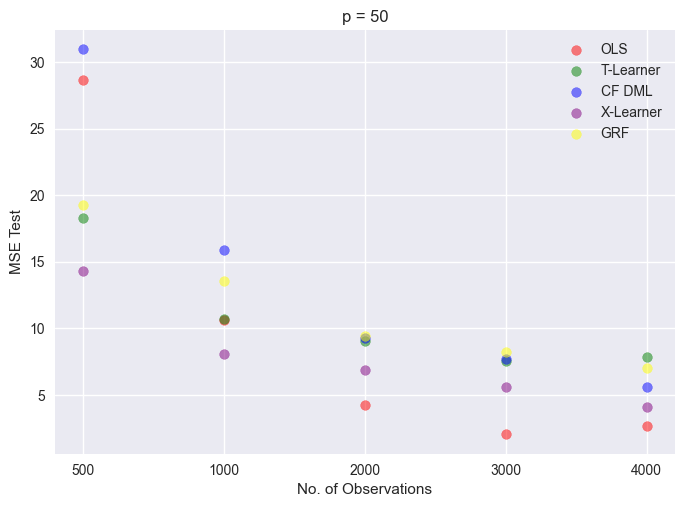

In [59]:
plot_mse_analysis_test(mse_50_features, 50)

In [184]:
def plot_mse_analysis_test(mse_list: list, p_list: list):
      
    plt.style.use('seaborn-v0_8')

    mse_list = enumerate(mse_list)
    p_list = enumerate(p_list)

    fig = plt.figure(figsize=(8,8))
    gs = fig.add_gridspec(nrows=2, ncols=2, hspace=0.2)
    axs = gs.subplots(sharex=True, sharey=True)
    
    for j in range(0,2): 
        for i in range(0, 2):

            colors = enumerate(['red', 'green', 'blue', 'purple', 'yellow'])
            mse_dict = next(mse_list)[1]
            
            for est, mse_df in mse_dict.items():
                color = next(colors)
                
                axs[j, i].scatter(mse_df['n'], mse_df['MSE Test'], s=20, marker='o', color = color[1], label=est)

            p = next(p_list)[1]
            axs[j, i].set_title(f'p $=$ {p}')


        if j == 0 and i==1:
            axs[j, i].legend()
        else:
            continue
    # Create a single legend for the entire figure

    #fig.suptitle('Influence of Individual Feature Values on the CATE Function', y=0.96)
    fig.text(0.5, 0.04, 'No. of Observations', ha='center')
    fig.text(0.04, 0.5, 'MSE Test', va='center', rotation='vertical')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    #for ax in axs.flat:
     #   ax.label_outer()

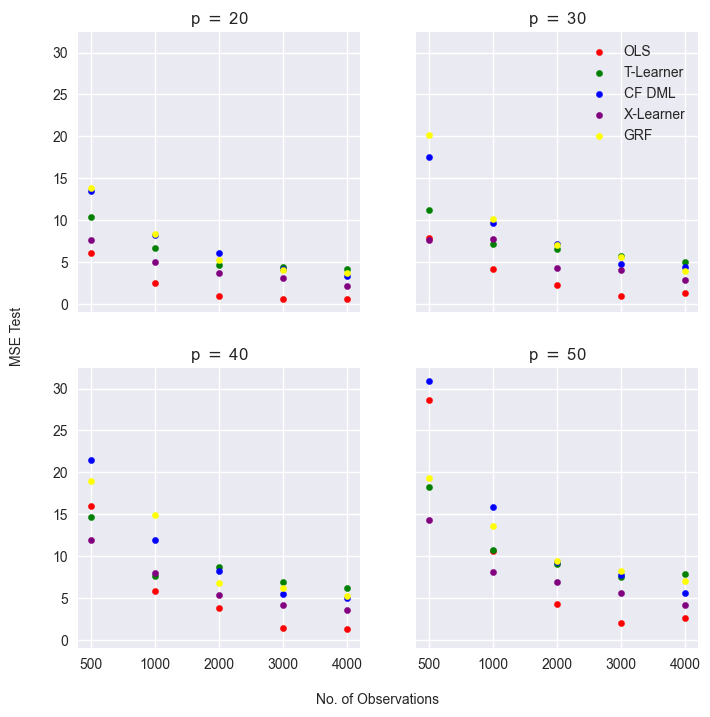

In [185]:
mse_list = [mse_20_features, mse_30_features, mse_40_features, mse_50_features]
plot_mse_analysis_test(mse_list, p_list)

In [69]:
with open('mse_20_features.pkl', 'wb') as pickle_file:
    pickle.dump(mse_20_features, pickle_file)

with open('mse_30_features.pkl', 'wb') as pickle_file:
    pickle.dump(mse_30_features, pickle_file)

with open('mse_40_features.pkl', 'wb') as pickle_file:
    pickle.dump(mse_40_features, pickle_file)

with open('mse_50_features.pkl', 'wb') as pickle_file:
    pickle.dump(mse_50_features, pickle_file)